<a href="https://colab.research.google.com/github/votamvan/cs582/blob/master/ML_Project1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS582 Machine Learning - Project 1
Professor: Mohamed Abdelrazik

Team:
*   Tam Van Vo - 610746
*   Quynh Pham - 610716
*   Samsher Bahadur Rana - 611060
*   Van Vong Tran - 610772
*   Yared Geberetsadik Beyene - 110466

Project Colab URL: https://colab.research.google.com/drive/1iqL0DPrwJ2okp3muu7IZ-pl4RKnbMr-1

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Ref of EDA:https://www.dataquest.io/blog/kaggle-getting-started/

***Only reference on EDA section, the rest are done by team manually


# Install auto-sklearn

In [0]:
# !apt-get install swig -y
# !pip install Cython numpy
# !pip install auto-sklearn


#Load all libs




In [0]:
from random import randrange
import numpy as np
import seaborn as sns
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 1: Data Loading

In [0]:
!git clone https://github.com/votamvan/cs582.git

fatal: destination path 'cs582' already exists and is not an empty directory.


In [0]:
#from google.colab import files
#uploaded = files.upload()
df_train = pd.read_csv('/content/cs582/data/house-prices/train.csv')
df_test = pd.read_csv('/content/cs582/data/house-prices/test.csv')
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
142,143,50,RL,71.0,8520,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,4,1952,1952,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,No,Rec,507,Unf,0,403,910,GasA,...,Y,SBrkr,910,475,0,1385,0,0,2,0,4,1,TA,6,Typ,0,NaN,Detchd,2000.0,Unf,2,720,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,166000
539,540,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,479.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1358,Unf,0,223,1581,GasA,...,Y,SBrkr,1601,0,0,1601,1,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,670,TA,TA,Y,180,0,0,0,0,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000
1214,1215,85,RL,69.0,10205,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SFoyer,5,5,1962,1962,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,784,Unf,0,141,925,GasA,...,Y,SBrkr,999,0,0,999,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1962.0,Unf,1,300,TA,TA,Y,150,72,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,134500
1293,1294,60,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,194,Unf,0,638,832,GasA,...,Y,SBrkr,832,832,0,1664,0,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1976.0,RFn,2,528,TA,TA,Y,0,28,0,0,259,0,NaN,GdWo,NaN,0,3,2006,WD,Normal,162900
1403,1404,20,RL,49.0,15256,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,84.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,929,Unf,0,556,1485,GasA,...,Y,SBrkr,1464,0,0,1464,1,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Unf,3,754,TA,TA,Y,168,160,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,282922


# Step 2: EDA

# SalePrice

SalePrice Skew =  1.8828757597682129


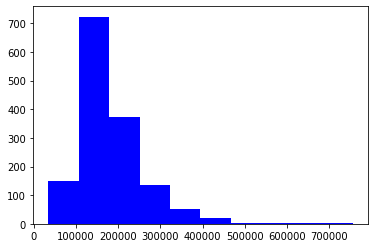

In [0]:
print ("SalePrice Skew = ", df_train.SalePrice.skew())
ax = plt.hist(df_train.SalePrice, color='blue')

Now we use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data. 

SalePrice Skew is: 0.12133506220520406


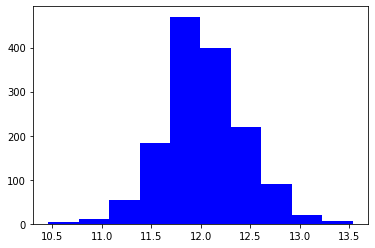

In [0]:
target = np.log(df_train.SalePrice)
print ("SalePrice Skew is:", target.skew())
ax = plt.hist(target, color='blue')

A value closer to 0 means that we have improved the skewness of the data. We can see visually that the data will more resembles a normal distribution.

# Handle Numerical Data

In [0]:
numeric_features = df_train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Correlation with SalePrice")
print (corr['SalePrice'].sort_values(ascending=False)[:5])
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

Correlation with SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The median sales price strictly increases as Overall Quality increases.


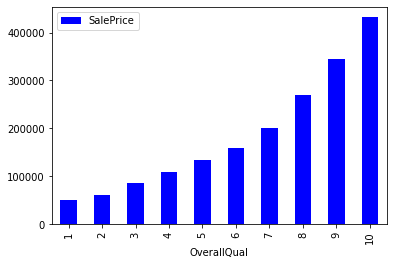

In [0]:
quality_pivot = df_train.pivot_table(index='OverallQual', 
                                     values='SalePrice', aggfunc=np.median)
ax = quality_pivot.plot(kind='bar', color='blue')
print("The median sales price strictly increases as Overall Quality increases.")

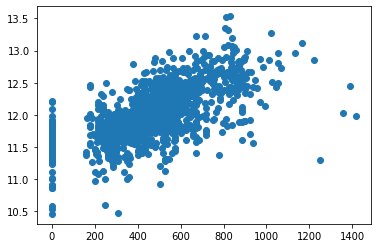

In [0]:
ax = plt.scatter(x=df_train['GarageArea'], y=target)

Remove outliers


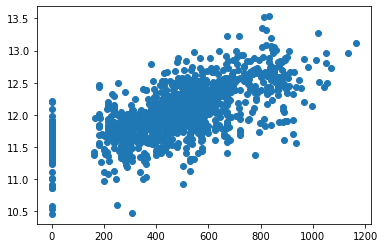

In [0]:
print('Remove outliers')
df_train = df_train[df_train['GarageArea'] < 1200]
target = np.log(df_train.SalePrice)
ax = plt.scatter(x=df_train['GarageArea'], y=target)

#Handle non-numerial data

```
'Street','Alley'
'Grvl':0, 'Pave':1,'NA':-1

'LotShape'
'Reg':3,'IR1':2,'IR2':1,'IR3':0

'LandContour'
'Lvl':1,'Bnk':0,'Low':0,'HLS':0

'Utilities'
'AllPub': 3,'NoSewr': 2,'NoSeWa': 1,'ELO':0

'BsmtFinType1','BsmtFinType2','GarageFinish'
'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0, 'RFn':1,'Fin':2

'PavedDrive'
'N':0,'Y':1,'P':0.5

'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC'
'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'NA':-1, 'Po':0, 'No':0,'Mn':1,'Av':2

'CentralAir'
'N':0,'Y':1
```



In [0]:
def ranking_features(df,feature,di):
  for feature in features:       
      df[feature].replace(di, inplace=True)
      df[feature]=df[feature].fillna(-1)
  return df
di = {'Grvl':0, 'Pave':1,'NA':-1,'Reg':3,'IR1':2,'IR2':1,
      'IR3':0,'Lvl':1,'Bnk':0,'Low':0,'HLS':0,'AllPub': 3,
      'NoSewr': 2,'NoSeWa': 1,'ELO':0,'GLQ':5,'ALQ':4,'BLQ':3,
      'Rec':2,'LwQ':1,'Unf':0, 'RFn':1,'Fin':2,'N':0,'Y':1,
      'P':0.5,'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'Po':0, 'No':0,'Mn':1,'Av':2}
features = ['Street','Alley','LotShape','LandContour','Utilities','BsmtFinType1',
            'BsmtFinType2','GarageFinish','PavedDrive','ExterQual','ExterCond',
            'BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu',
            'GarageQual','GarageCond','PoolQC','CentralAir']
df_train = ranking_features(df_train,features,di)
df_test = ranking_features(df_test,features,di)

Encode Street data


1    1450
0       5
Name: enc_street, dtype: int64


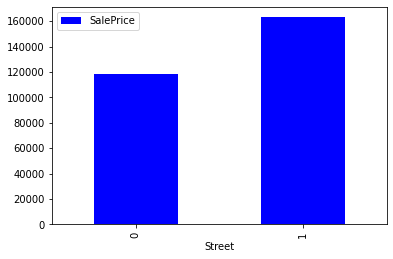

In [0]:
street_pivot = df_train.pivot_table(index='Street', 
                                    values='SalePrice', aggfunc=np.median)
ax = street_pivot.plot(kind='bar', color='blue')
df_train['enc_street'] = pd.get_dummies(df_train.Street, drop_first=True)
df_test['enc_street'] = pd.get_dummies(df_test.Street, drop_first=True)
print (df_train.enc_street.value_counts())

Encode SaleCondition

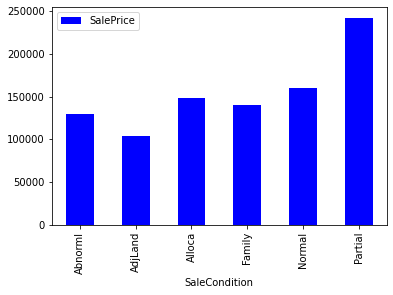

In [0]:
condition_pivot = df_train.pivot_table(index='SaleCondition', 
                                       values='SalePrice', aggfunc=np.median)
ax = condition_pivot.plot(kind='bar', color='blue')

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.

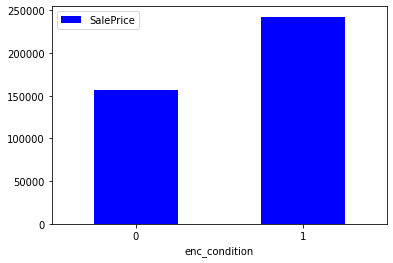

In [0]:
def encode(x):
 return 1 if x == 'Partial' else 0
df_train['enc_condition'] = df_train.SaleCondition.apply(encode)
df_test['enc_condition'] = df_test.SaleCondition.apply(encode)
condition_pivot = df_train.pivot_table(index='enc_condition', 
                                       values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
ax = plt.xticks(rotation=0)

# Handle null data

In [0]:
def unique_nullcount(df):
  rows = []
  for (i, j) in df.iteritems(): 
      rows.append([i, df_train[i].nunique(), df_train[i].isna().sum()])
  df = pd.DataFrame(rows, columns=["Feature", 
                                   "Unique value","Count null"]).sort_values(["Unique value",
                                                                              "Count null"], ascending = (True,True))
  pd.set_option('display.max_rows', df.shape[0]+1)
  return df

def unique_value_list(df,feature, ct):
  features = df[df[feature] < ct]['Feature']
  for i in features: 
      print(i, df_train[i].unique())


In [0]:
df = unique_nullcount(df_train.select_dtypes(include=[np.number]))
print(df[df['Count null']>0])

        Feature  Unique value  Count null
41  GarageYrBlt            97          81
2   LotFrontage           110         258
13   MasVnrArea           325           8


In [0]:
df_train.LotFrontage=df_train.LotFrontage.fillna(0.0)
df_train.MasVnrArea=df_train.MasVnrArea.fillna(0.0)
df_train.GarageYrBlt=df_train.GarageYrBlt.fillna(df_train.GarageYrBlt.mode()[0])

df_test.LotFrontage=df_test.LotFrontage.fillna(0.0)
df_test.MasVnrArea=df_test.MasVnrArea.fillna(0.0)
df_test.GarageYrBlt=df_test.GarageYrBlt.fillna(df_test.GarageYrBlt.mode()[0])

In [0]:
df = unique_nullcount(df_train.select_dtypes(include=[np.number]))
print(df[df['Count null']>0])

Empty DataFrame
Columns: [Feature, Unique value, Count null]
Index: []


# Correlation between the features

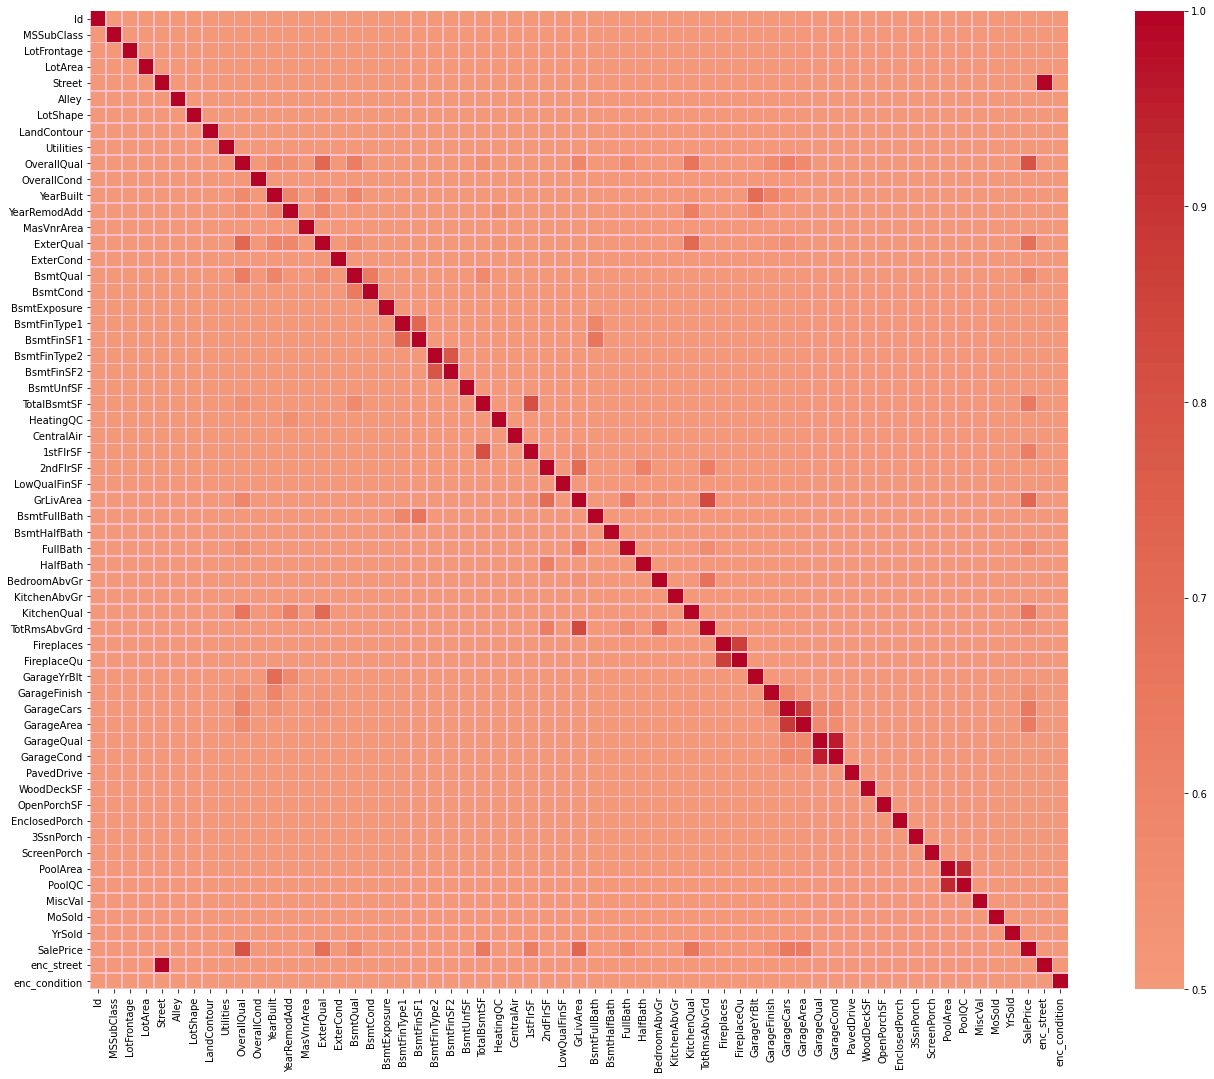

In [0]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat,vmin=0.5, vmax=1, center= 0, cmap= 'coolwarm', square=True,linewidths=0.5, linecolor='pink');

From the heat map above, we can see the strong relation between these attributes:


```
YearBuilt and GarageYrBlt
TotRmsAbvGrd and GrliveArea
FireplaceQu and Fireplaces
GarageCars and GarageArea
1stFlrSF and TotalBsmtSF
PoolQC and PoolArea
GarageQual and GarageCond
```
We can remove one of these out of the final data model. We may not want to remove the 1stFlrSF and TotalBsmtSF because sometimes houes doesn't have a basement



In [0]:
df_train = df_train.drop(['Street', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea','Fireplaces', 'GarageCond','PoolArea'], axis=1)

# Step 3: Data Preparation

#Finalize dataset


In [0]:
from sklearn.model_selection import train_test_split
data = df_train.select_dtypes(include=[np.number]).interpolate().dropna()
X_all = data.drop(['SalePrice', 'Id'], axis=1)
y_all = np.log(df_train.SalePrice)
mean_y = np.mean(y_all)
y_all[y_all <= mean_y] = 0
y_all[y_all > mean_y] = 1
y_all = y_all.astype(int)
# Standardization of datasets
X,y=X_all, y_all
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X, X_test, y, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Step 4: Choose Model
1. Get best estimator
2. Training Curve and Validation Curve 

#General Functions

In [0]:
from sklearn.model_selection import GridSearchCV
def best_estimator(estimator,tuned_parameters,X,y,cv):
  grid = GridSearchCV(estimator, tuned_parameters, 
                      cv = cv, scoring = 'accuracy', n_jobs=-1)
  grid.fit(X,y)
  best_estimator = grid.best_estimator_
  best_score = grid.best_score_
  print(f'Best score: {grid.best_score_}')
  print(grid.best_estimator_)
  return best_estimator, best_score

In [0]:
#show complexity curve (validation curve) and learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
def plot_learning_curve(estimator, title, X, y, ax=None, 
                        cv=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    if ax is None: _, ax = plt.subplots(figsize=(20, 5))
    ax.set_title(title+' Learning Curve')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    return plt
def plot_validation_curve(estimator, title, X, y, ax=None, cv=None, param_name=None, param_range=None):
    if ax is None: _, ax = plt.subplots(figsize=(20, 5))
    ax.set_title(title+' Validation Curve')
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, 
                                                 param_range=param_range, 
                                                 scoring="accuracy", cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
    ax.grid()
    ax.semilogx(param_range, train_scores_mean, 'o-', color="r", label="Training score")
    ax.fill_between(param_range, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.semilogx(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.fill_between(param_range, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.legend(loc="best")
    ax.set_xlabel(param_name)
    ax.set_ylabel("Score")
    return plt


def show_TV_curve(estimator, title, X,y, param_name, param_range, cv) :  
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
  plot_learning_curve(estimator, title, X, y, ax=ax1, cv=cv)
  plot_validation_curve(estimator, title, X, y, ax=ax2, cv=cv, 
                        param_name=param_name, param_range=param_range)
  plt.show()

# 1/ KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1,30)
tuned_parameters = dict(n_neighbors = k_range)
knn_estimator, knn_score = best_estimator(KNeighborsClassifier(), tuned_parameters,X,y,10)


Best score: 0.8986254295532646
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


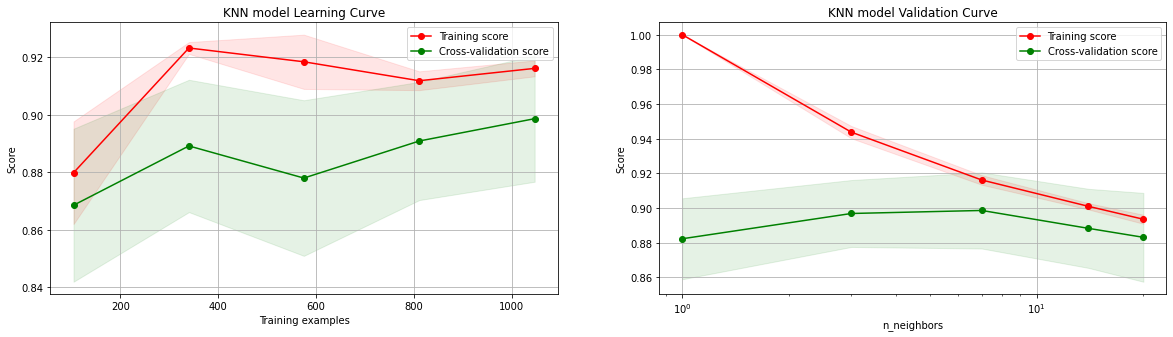

In [0]:
param_range = [1,3,7,14,20]
show_TV_curve(knn_estimator,'KNN model',X,y,'n_neighbors',param_range,10)


From the Learning Curve, by inceasing the size of data, the model getting better

From the Validation Curve, by starting point at k=1 the model becomes overfitting. By increasing the n_neighbors value we getting better training score and CV score. 
But after n_neighbors> 7, the curves going down. So after this point if we increasing the k doesn't improve the model


# 2/ SVC
I have tried all kernels functions such as linear, polynomial, rbf and sigmoid. However, I found that linear kernel always win in this binary classification problem. Moreover, the other kernels are taken alot of time to run GridSearchCV than linear kernel. Therefore, I decide to include only linear kernel in this final version. The best score is about 0.92.

In [0]:
from sklearn.svm import LinearSVC
tuned_parameters = {
    'C': [0.001, 0.1, 1, 10, 100]
}
svc_estimator, svc_score = best_estimator(LinearSVC(), tuned_parameters,X,y,5)

Best score: 0.9201030927835051
LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


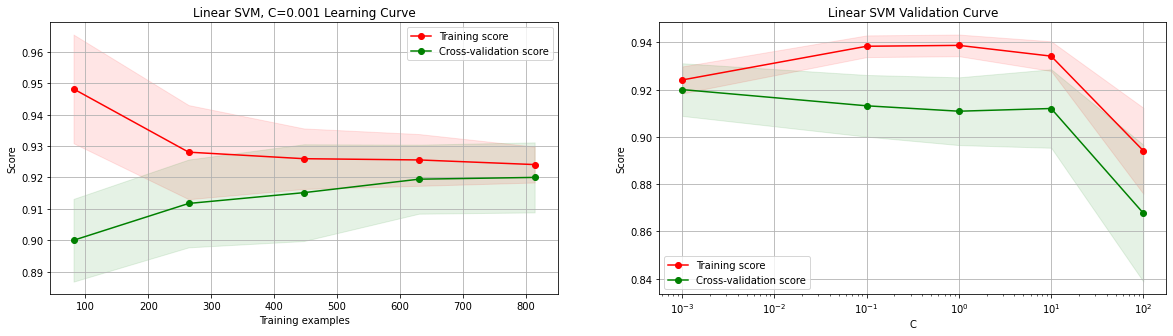

In [0]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
title = f"Linear SVM, C={svc_estimator.C}"
plot_learning_curve(svc_estimator, title, X, y, ax=ax1, cv=cv)
plot_validation_curve(svc_estimator, "Linear SVM", X, y, ax=ax2, cv=cv, 
                      param_name="C", param_range=[0.001, 0.1, 1, 10, 100])
plt.show()

Linear SVM learning curve diagram tell us that the CV score do not increase when the number of training samples > 800. It means that if we add more training data the model doesn't improve anymore.

 

Linear SVM validation curve diagram tell us that the CV score go down when we increase regularization parameter C. It means that the model becomes overfitting when C > 0.001

#3/ Logistic

In [0]:
from sklearn.linear_model import LogisticRegression
tuned_parameters = {
    'C': np.logspace(-3,3,7),
    'penalty':['l1','l2']# l1 lasso l2 ridge
}
log_estimator,log_score = best_estimator(LogisticRegression(), tuned_parameters,X,y,10)

Best score: 0.9218213058419243
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


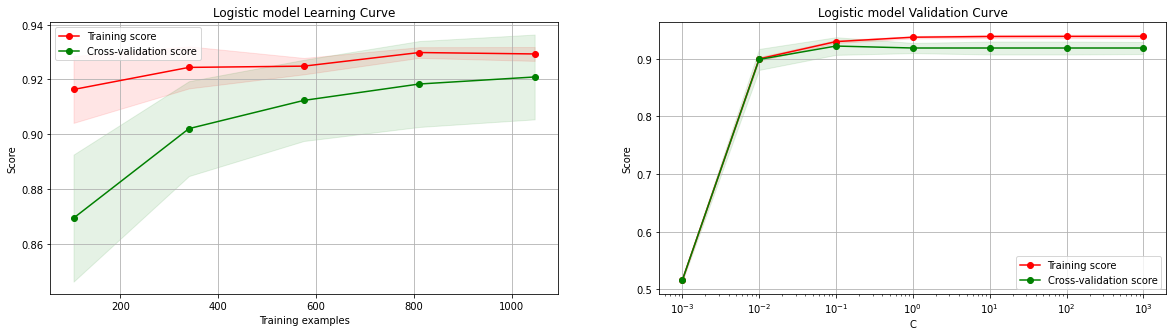

In [0]:
param_range = np.logspace(-3,3,7)
show_TV_curve(log_estimator,'Logistic model',X,y,'C',param_range,10)

As you see in validation curve, the best value for C is 0.1 and penalty='l1' - lasso, at this value, cross validation reach the highest point.

From the learning curve, the chart, the model reach the highest score after training 1000 samples, adding more training data won't help. We can improve by adjusting features not by adding more data.

#4/ Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
tuned_parameters = {
     'max_depth':np.arange(1,20)
}
dt_estimator,dt_score = best_estimator(DecisionTreeClassifier(), tuned_parameters,X,y,5)

Best score: 0.8797250859106529
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


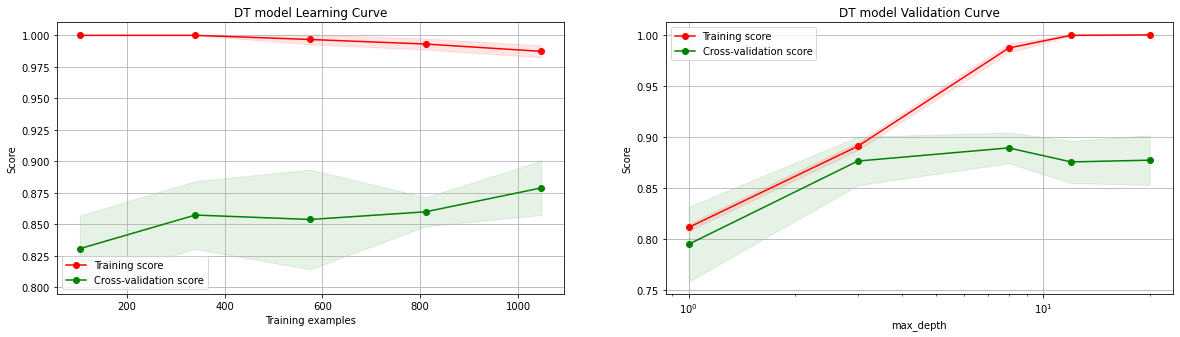

In [0]:
param_range = [1,3,8,12,20]
show_TV_curve(dt_estimator,'DT model',X,y,'max_depth',param_range,10)

From the validation curve we can see with max_depth in between 5-8, model has pretty good performance but by increasing the depth, the model becomes overfitting

# 5/ MLP

In [0]:
from sklearn.neural_network import MLPClassifier
tuned_parameters = {
    'hidden_layer_sizes': [(5,),(10,),(20,)]
}
mlp_estimator, mlp_score = best_estimator(MLPClassifier(max_iter=300), tuned_parameters,X,y,12)

Best score: 0.9132302405498282
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


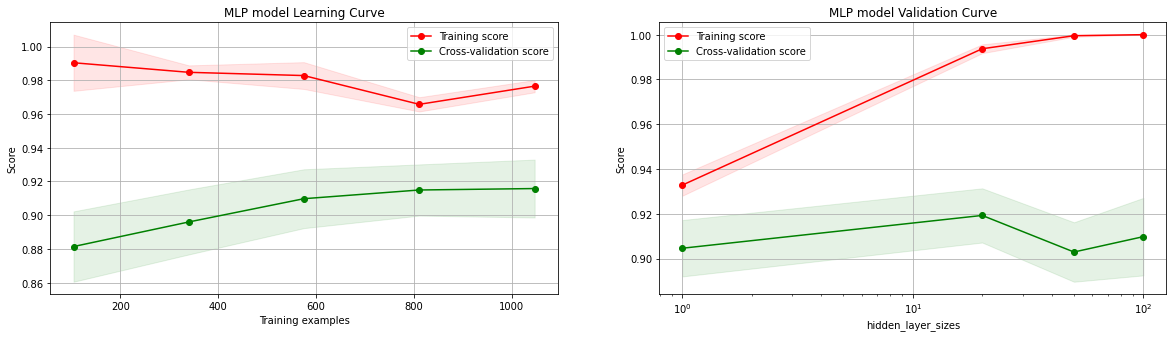

In [0]:
param_range = [1, 20, 50,100]
show_TV_curve(mlp_estimator,'MLP model',X,y,'hidden_layer_sizes',param_range,10)

From the validation curve we can see with hidden_layer_sizes = 10, model has pretty good performance but by increasing the size, the model become overfitting

# Step 5: AUC curve

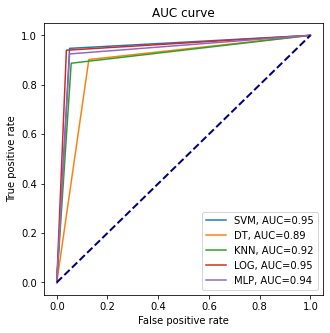

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics
def plot_roc_curve(estimators, titles, X, y, ax=None):
    if ax is None: _, ax = plt.subplots(figsize=(5, 5))

    for i, estimator in enumerate(estimators):
      y_pred = estimator.predict(X)
      fpr, tpr, _ = roc_curve(y, y_pred)
      ax.plot(fpr, tpr, label=f"{titles[i]}, AUC=" + "{:.2f}".format(metrics.auc(fpr, tpr)))

    ax.set_title('AUC curve')
    ax.legend(loc='best')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate') 
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    return plt

estimators = [svc_estimator,dt_estimator,knn_estimator,log_estimator,mlp_estimator]
titles = ['SVM','DT','KNN','LOG','MLP']
plot_roc_curve(estimators, titles, X_test, y_test)
plt.show()

SVM and LOG have the best AUC score which is close to 95%



# Step 6: Ensemble

By Voting

In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

eclf1 = VotingClassifier(voting='hard', 
 estimators=[('knn', knn_estimator), ('svc', svc_estimator), 
 ('log', log_estimator), ('dt', dt_estimator), ('mlp', mlp_estimator)] )

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    eclf1.fit(X, y)
    y_pred = eclf1.predict(X_test)
    voting_score = accuracy_score(y_test, y_pred)
    print(f"Voting Accuracy Score = {accuracy_score(y_test, y_pred)}")
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    print(f"AUC Score = {metrics.auc(fpr, tpr)}")


Voting Accuracy Score = 0.9450171821305842
AUC Score = 0.9446083563338726


# Step 7: Apply AutoML

In [0]:
import sklearn
import autosklearn.classification

automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X, y)
y_hat = automl.predict(X_test)
auto_score = sklearn.metrics.accuracy_score(y_test, y_hat)
print("Accuracy score", auto_score)
print(sklearn.metrics.classification_report(y_test, y_hat))

Accuracy score 0.9450171821305842
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       158
           1       0.95      0.93      0.94       133

    accuracy                           0.95       291
   macro avg       0.95      0.94      0.94       291
weighted avg       0.95      0.95      0.94       291



# Step 8: Score comparision

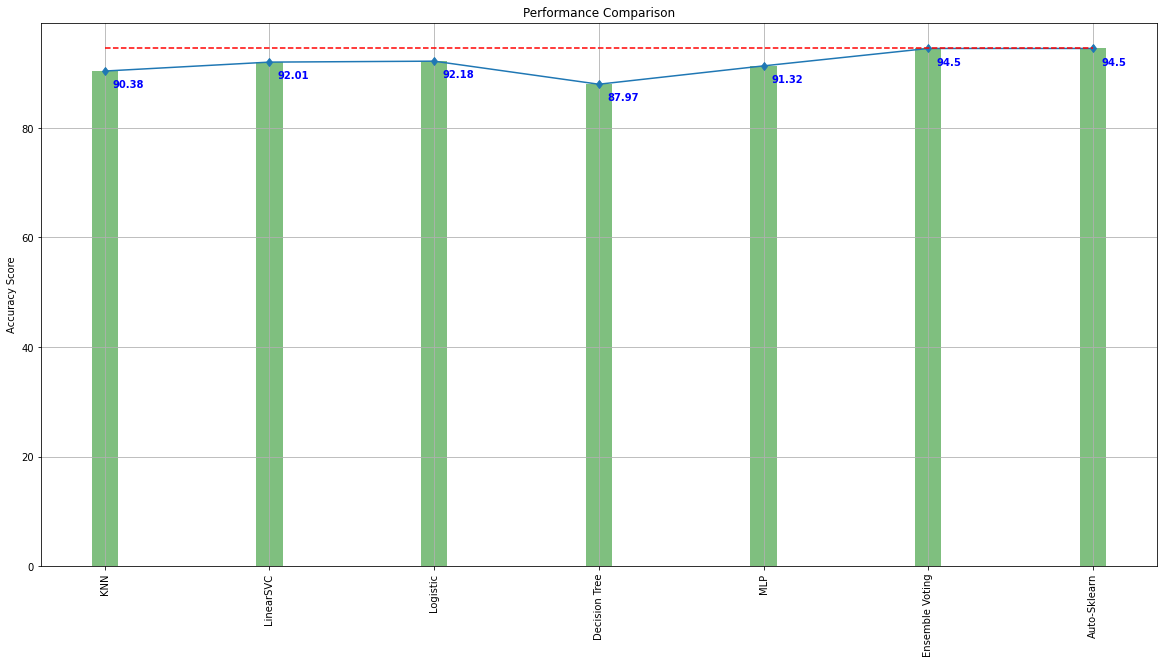

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
models = {
 "KNN" : knn_score,
 "LinearSVC": svc_score,
 "Logistic": log_score,
 "Decision Tree": dt_score,
 "MLP": mlp_score,
 "Ensemble Voting": voting_score,
 "Auto-Sklearn": auto_score
}
results = []
names = []
for name, accuracy in models.items():
 names.append(name)
 results.append(accuracy*100)
 
# fig, ax = plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
x_pos = np.arange(0, 5*len(names), 5)
plt.bar(x_pos, results, align='center', alpha=0.5, color='green')
plt.plot(x_pos, results, marker='d')
 
max_score = [max(results)]*len(names)
plt.plot(x_pos, max_score, '--r')
plt.xticks(x_pos, names, rotation=90)
for i, v in enumerate(results):
 plt.text(x_pos[i] + .25, v - 3, str(round(v, 2)), color='blue', fontweight='bold')
plt.ylabel('Accuracy Score')
plt.title('Performance Comparison')
plt.grid()
plt.show()